<a href="https://colab.research.google.com/github/Kotyga/aiarrow_2024/blob/main/%D0%92%D0%B2%D0%B5%D0%B4%D0%B5%D0%BD%D0%B8%D0%B5_%D0%B2_%D0%9C%D0%9E.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Синтетические данные

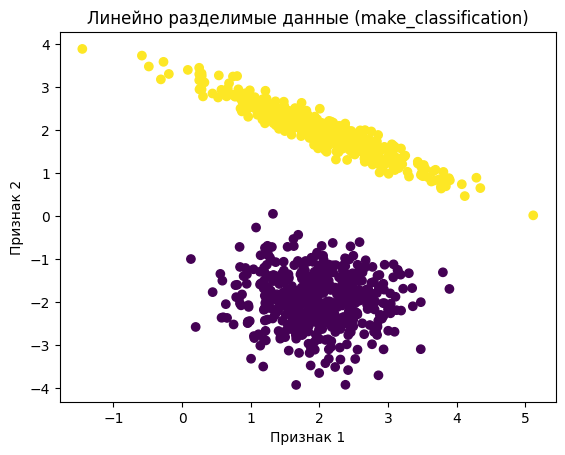

In [ ]:
from sklearn.datasets import make_classification
import matplotlib.pyplot as plt

X, y = make_classification(n_samples=1000,
                           n_features=2,
                           n_informative=2,
                           n_redundant=0,
                           n_clusters_per_class=1,
                           flip_y=0,
                           class_sep=2)

plt.scatter(X[:, 0], X[:, 1], c=y, cmap='viridis')
plt.title('Линейно разделимые данные (make_classification)')
plt.xlabel('Признак 1')
plt.ylabel('Признак 2')
plt.show()

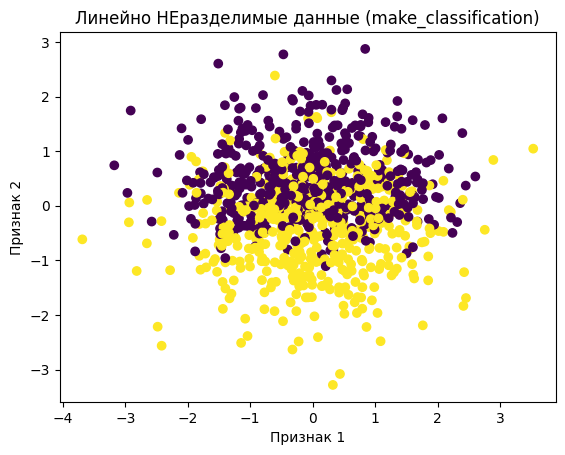

In [ ]:
# Генерация данных для задачи классификации
X, y = make_classification(n_samples=1000, n_features=20, random_state=42)

# Визуализация данных
plt.scatter(X[:, 0], X[:, 1], c=y, cmap='viridis')
plt.title('Линейно НЕразделимые данные (make_classification)')
plt.xlabel('Признак 1')
plt.ylabel('Признак 2')
plt.show()

# Реальный кейс

In [ ]:
!pip install gdown
import gdown
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt

## Загрузка данных


In [ ]:
!gdown 1ERwQ5odiK1Zvi1LtjpkzCMUswYsAX8_K  # train.csv

Downloading...
From: https://drive.google.com/uc?id=1ERwQ5odiK1Zvi1LtjpkzCMUswYsAX8_K
To: /content/train.csv
100% 664k/664k [00:00<00:00, 52.1MB/s]


In [ ]:
data = pd.read_csv('./train.csv')
data.head(3)

,ClientPeriod,MonthlySpending,TotalSpent,Sex,IsSeniorCitizen,HasPartner,HasChild,HasPhoneService,HasMultiplePhoneNumbers,HasInternetService,HasOnlineSecurityService,HasOnlineBackup,HasDeviceProtection,HasTechSupportAccess,HasOnlineTV,HasMovieSubscription,HasContractPhone,IsBillingPaperless,PaymentMethod,Churn
0,55,19.50,1026.35,Male,0,Yes,Yes,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,One year,No,Mailed check,0
1,72,25.85,1872.2,Male,0,Yes,No,Yes,Yes,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Credit card (automatic),0
2,1,75.90,75.9,Male,0,No,No,Yes,No,Fiber optic,No,No,No,Yes,No,No,Month-to-month,Yes,Electronic check,1


In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5282 entries, 0 to 5281
Data columns (total 20 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   ClientPeriod              5282 non-null   int64  
 1   MonthlySpending           5282 non-null   float64
 2   TotalSpent                5282 non-null   object 
 3   Sex                       5282 non-null   object 
 4   IsSeniorCitizen           5282 non-null   int64  
 5   HasPartner                5282 non-null   object 
 6   HasChild                  5282 non-null   object 
 7   HasPhoneService           5282 non-null   object 
 8   HasMultiplePhoneNumbers   5282 non-null   object 
 9   HasInternetService        5282 non-null   object 
 10  HasOnlineSecurityService  5282 non-null   object 
 11  HasOnlineBackup           5282 non-null   object 
 12  HasDeviceProtection       5282 non-null   object 
 13  HasTechSupportAccess      5282 non-null   object 
 14  HasOnlin

In [ ]:
data.isna().sum()

ClientPeriod                0
MonthlySpending             0
TotalSpent                  0
Sex                         0
IsSeniorCitizen             0
HasPartner                  0
HasChild                    0
HasPhoneService             0
HasMultiplePhoneNumbers     0
HasInternetService          0
HasOnlineSecurityService    0
HasOnlineBackup             0
HasDeviceProtection         0
HasTechSupportAccess        0
HasOnlineTV                 0
HasMovieSubscription        0
HasContractPhone            0
IsBillingPaperless          0
PaymentMethod               0
Churn                       0
dtype: int64

In [ ]:
data['TotalSpent'] = data['TotalSpent'].apply(lambda x: float (x) if x != ' ' else 0)

In [ ]:
data.duplicated().sum()

14

In [ ]:
data.drop_duplicates(keep = 'first', inplace = True)

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 5268 entries, 0 to 5281
Data columns (total 20 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   ClientPeriod              5268 non-null   int64  
 1   MonthlySpending           5268 non-null   float64
 2   TotalSpent                5268 non-null   float64
 3   Sex                       5268 non-null   object 
 4   IsSeniorCitizen           5268 non-null   int64  
 5   HasPartner                5268 non-null   object 
 6   HasChild                  5268 non-null   object 
 7   HasPhoneService           5268 non-null   object 
 8   HasMultiplePhoneNumbers   5268 non-null   object 
 9   HasInternetService        5268 non-null   object 
 10  HasOnlineSecurityService  5268 non-null   object 
 11  HasOnlineBackup           5268 non-null   object 
 12  HasDeviceProtection       5268 non-null   object 
 13  HasTechSupportAccess      5268 non-null   object 
 14  HasOnlineTV  

## Визуальный анализ данных

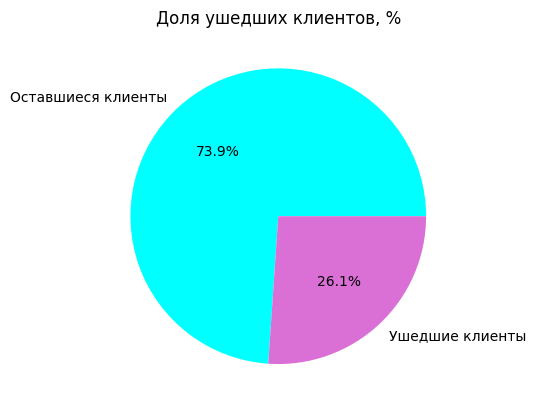

In [ ]:
c_1 = pd.DataFrame(data['Churn'].value_counts())

plt.pie(c_1['count'],
         labels = ['Оставшиеся клиенты', 'Ушедшие клиенты'],
         autopct='%1.1f%%',
         colors = ['aqua', 'orchid'])
plt.title('Доля ушедших клиентов, %');

## Кодирование данных

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder

In [ ]:
for i in data.columns:
  if data[i].dtype == 'O':
    data[i] = LabelEncoder().fit_transform(data[i])

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 5268 entries, 0 to 5281
Data columns (total 20 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   ClientPeriod              5268 non-null   int64  
 1   MonthlySpending           5268 non-null   float64
 2   TotalSpent                5268 non-null   float64
 3   Sex                       5268 non-null   int64  
 4   IsSeniorCitizen           5268 non-null   int64  
 5   HasPartner                5268 non-null   int64  
 6   HasChild                  5268 non-null   int64  
 7   HasPhoneService           5268 non-null   int64  
 8   HasMultiplePhoneNumbers   5268 non-null   int64  
 9   HasInternetService        5268 non-null   int64  
 10  HasOnlineSecurityService  5268 non-null   int64  
 11  HasOnlineBackup           5268 non-null   int64  
 12  HasDeviceProtection       5268 non-null   int64  
 13  HasTechSupportAccess      5268 non-null   int64  
 14  HasOnlineTV  

In [ ]:
data.head(3)

,ClientPeriod,MonthlySpending,TotalSpent,Sex,IsSeniorCitizen,HasPartner,HasChild,HasPhoneService,HasMultiplePhoneNumbers,HasInternetService,HasOnlineSecurityService,HasOnlineBackup,HasDeviceProtection,HasTechSupportAccess,HasOnlineTV,HasMovieSubscription,HasContractPhone,IsBillingPaperless,PaymentMethod,Churn
0,55,19.50,1026.35,1,0,1,1,1,0,2,1,1,1,1,1,1,1,0,3,0
1,72,25.85,1872.20,1,0,1,0,1,2,2,1,1,1,1,1,1,2,0,1,0
2,1,75.90,75.90,1,0,0,0,1,0,1,0,0,0,2,0,0,0,1,2,1


In [ ]:
X, y = data.drop(columns=['Churn']), data['Churn']

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

## KNN Classifier

In [ ]:
from sklearn.neighbors import KNeighborsClassifier

knn_model = KNeighborsClassifier(n_neighbors=25)
knn_model.fit(X_train, y_train)
print("Score on Test: " + str(knn_model.score(X_test, y_test)*100))
print("Score on Train: "+ str(knn_model.score(X_train, y_train)*100))

Score on Test: 77.89373814041745
Score on Train: 79.59183673469387


## Logistic Regression

In [ ]:
from sklearn.linear_model import LogisticRegression

log_model = LogisticRegression(solver='newton-cg' ,random_state=42)
log_model.fit(X_train, y_train)
print("Score on Test: " + str(log_model.score(X_test, y_test)*100))
print("Score on Train: "+ str(log_model.score(X_train, y_train)*100))

Score on Test: 80.26565464895636
Score on Train: 80.56478405315615


## Naive Bayes

In [ ]:
from sklearn.naive_bayes import GaussianNB

naive_model = GaussianNB()
naive_model.fit(X_train, y_train)
print("Score on Test: " + str(naive_model.score(X_test, y_test)*100))
print("Score on Train: "+ str(naive_model.score(X_train, y_train)*100))

Score on Test: 75.33206831119544
Score on Train: 75.7000474608448


## Decision Tree

In [ ]:
# Importing Decision Tree
from sklearn.tree import DecisionTreeClassifier

decision_model = DecisionTreeClassifier(random_state=42)
decision_model.fit(X_train, y_train)
print("Score on Test: " + str(decision_model.score(X_test, y_test)*100))
print("Score on Train: "+ str(decision_model.score(X_train, y_train)*100))

Score on Test: 72.01138519924099
Score on Train: 99.85761746559089


## SVM

In [ ]:
from sklearn.svm import SVC

svm_model = SVC()
svm_model.fit(X_train, y_train)
print("Score on Test: " + str(svm_model.score(X_test, y_test)*100))
print("Score on Train: "+ str(svm_model.score(X_train, y_train)*100))

Score on Test: 73.33965844402277
Score on Train: 74.06264831514001


## Random Forest Classsifier

In [ ]:
from sklearn.ensemble import RandomForestClassifier

rf_model = RandomForestClassifier(n_estimators=40, max_depth=5)
rf_model.fit(X_train, y_train)
print("Score on Test: " + str(rf_model.score(X_test, y_test)*100))
print("Score on Train: "+ str(rf_model.score(X_train, y_train)*100))

Score on Test: 80.07590132827325
Score on Train: 81.18177503559563


## VotingClassifier

In [ ]:
from sklearn.ensemble import VotingClassifier

evc=VotingClassifier(estimators=[('mnb',naive_model),('lr',log_model),('rf',rf_model),('svm',svm_model)],voting='hard')
evc.fit(X_train, y_train)
print("Score on Test: " + str(evc.score(X_test, y_test)*100))
print("Score on Train: "+ str(evc.score(X_train, y_train)*100))

Score on Test: 79.98102466793169
Score on Train: 80.23255813953489


In [ ]:
from prettytable import PrettyTable

Models =  ['KNN Classifier', 'Logistic Regression','Naive Bayes', 'Decision Tree', 'Support Vector Machine','Random Forest','Voting Classifier']

Test_scores = [77.89, 80.26, 75.33, 72.01, 73.33, 80.07, 79.98,]
Train_scores = [79.59, 80.56, 75.70, 99.85, 74.06, 81.18, 80.23]

# Specify the Column Names while initializing the Table
Results = PrettyTable()

Results.add_column('Model', Models)
Results.add_column('Test_Score', Test_scores)
Results.add_column('Train_Score', Train_scores)

print('Results: ')
print(Results)

Results: 
+------------------------+------------+-------------+
|         Model          | Test_Score | Train_Score |
+------------------------+------------+-------------+
|     KNN Classifier     |   77.89    |    79.59    |
|  Logistic Regression   |   80.26    |    80.56    |
|      Naive Bayes       |   75.33    |     75.7    |
|     Decision Tree      |   72.01    |    99.85    |
| Support Vector Machine |   73.33    |    74.06    |
|     Random Forest      |   80.07    |    81.18    |
|   Voting Classifier    |   79.98    |    80.23    |
+------------------------+------------+-------------+
